## Step 1. Data Processing

### 1.1 Loading the Data

In [1]:
import os

# Change to your desired directory
os.chdir('/common/users/sk2779/df_words') # change $USER to netid

# Confirm it's changed
print("Current directory:", os.getcwd())

Current directory: /common/users/sk2779/df_words


In [2]:
import pickle

with open('./dfwords_0_20000.pkl', 'rb') as file:
    loaded_dfwords1 = pickle.load(file)

with open('./dfwords_20000_40000.pkl', 'rb') as file:
    loaded_dfwords2 = pickle.load(file)

with open('./dfwords_40000_60000.pkl', 'rb') as file:
    loaded_dfwords3 = pickle.load(file)

with open('./dfwords_60000_80000.pkl', 'rb') as file:
    loaded_dfwords4 = pickle.load(file)

with open('./dfwords_80000_100000.pkl', 'rb') as file:
    loaded_dfwords5 = pickle.load(file)

with open('./dfwords_100000_120000.pkl', 'rb') as file:
    loaded_dfwords6 = pickle.load(file)

with open('./dfwords_120000_140000.pkl', 'rb') as file:
    loaded_dfwords7 = pickle.load(file)

with open('./dfwords_140000_160000.pkl', 'rb') as file:
    loaded_dfwords8 = pickle.load(file)

with open('./dfwords_160000_180000.pkl', 'rb') as file:
    loaded_dfwords9 = pickle.load(file)

with open('./dfwords_180000_200000.pkl', 'rb') as file:
    loaded_dfwords10 = pickle.load(file)

with open('./dfwords_200000_227055.pkl', 'rb') as file:
    loaded_dfwords11 = pickle.load(file)

In [3]:
import pandas as pd

loaded_dfwords = pd.concat([loaded_dfwords1, loaded_dfwords2], ignore_index=True)  # vertical stack
loaded_dfwords = pd.concat([loaded_dfwords, loaded_dfwords3], ignore_index=True)  # vertical stack
loaded_dfwords = pd.concat([loaded_dfwords, loaded_dfwords4], ignore_index=True)  # vertical stack
loaded_dfwords = pd.concat([loaded_dfwords, loaded_dfwords5], ignore_index=True)  # vertical stack
loaded_dfwords = pd.concat([loaded_dfwords, loaded_dfwords6], ignore_index=True)  # vertical stack
loaded_dfwords = pd.concat([loaded_dfwords, loaded_dfwords7], ignore_index=True)  # vertical stack
loaded_dfwords = pd.concat([loaded_dfwords, loaded_dfwords8], ignore_index=True)  # vertical stack
loaded_dfwords = pd.concat([loaded_dfwords, loaded_dfwords9], ignore_index=True)  # vertical stack
loaded_dfwords = pd.concat([loaded_dfwords, loaded_dfwords10], ignore_index=True)  # vertical stack
loaded_dfwords = pd.concat([loaded_dfwords, loaded_dfwords11], ignore_index=True)  # vertical stack

In [4]:
loaded_dfwords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227055 entries, 0 to 227054
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      227055 non-null  object
 1   text    227055 non-null  object
 2   image   227055 non-null  object
dtypes: object(3)
memory usage: 5.2+ MB


In [5]:
df_images= loaded_dfwords
del loaded_dfwords

In [6]:
df_images.head(3)

,id,text,image
0,7u2pNft,4,"[[[211, 209, 208], [210, 208, 207], [211, 209,..."
1,EHXbhtL,↳,"[[[187, 166, 139], [188, 167, 140], [190, 169,..."
2,EHXbhtL,co,"[[[188, 164, 134], [188, 164, 134], [189, 165,..."


### 1.4 Splitting the Training Data into Training and Validation Subsets

In [7]:
import os

# Change to the project directory
os.chdir('/common/home/sk2779/courses/cs439/stylized-ocr')

# Confirm it's changed
print("Current directory:", os.getcwd())

Current directory: /common/home/sk2779/courses/cs439/stylized-ocr


In [62]:
import pandas as pd
df_train=pd.read_csv("df_train.csv")

In [63]:
df_train.head()

,word_id,id,text
0,0,EHXbhtL,co
1,1,EHXbhtL,-bey
2,2,O91MhJ1,NORTON'S
3,3,O91MhJ1,THEORY
4,4,O91MhJ1,A


In [9]:
# remove potential duplicates before merge
del df_images["id"]
del df_images["text"]

In [10]:
df_images.head(2)

,image
0,"[[[211, 209, 208], [210, 208, 207], [211, 209,..."
1,"[[[187, 166, 139], [188, 167, 140], [190, 169,..."


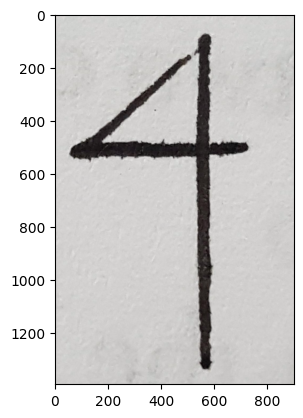

In [64]:
plt.imshow(df_images['image'][0])

In [11]:
df_train = df_images.merge(df_train, left_index=True, right_on='word_id')

In [12]:
df_train.head()

,image,word_id,id,text
0,"[[[211, 209, 208], [210, 208, 207], [211, 209,...",0,EHXbhtL,co
1,"[[[187, 166, 139], [188, 167, 140], [190, 169,...",1,EHXbhtL,-bey
2,"[[[188, 164, 134], [188, 164, 134], [189, 165,...",2,O91MhJ1,NORTON'S
3,"[[[180, 161, 134], [181, 162, 135], [184, 163,...",3,O91MhJ1,THEORY
4,"[[[189, 167, 142], [189, 167, 142], [189, 167,...",4,O91MhJ1,A


In [13]:
from sklearn.model_selection import train_test_split
import pandas as pd

train_df, eval_df = train_test_split(df_train, test_size=0.2, random_state=42)

train_df = train_df.reset_index(drop=True)
eval_df = eval_df.reset_index(drop=True)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132067 entries, 0 to 132066
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   image    132067 non-null  object
 1   word_id  132067 non-null  int64 
 2   id       132067 non-null  object
 3   text     132067 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.0+ MB


In [15]:
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33017 entries, 0 to 33016
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    33017 non-null  object
 1   word_id  33017 non-null  int64 
 2   id       33017 non-null  object
 3   text     33017 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


image      [[[165, 153, 141], [165, 153, 141], [167, 155,...
word_id                                               123530
id                                                   Im6dkfT
text                                                     are
Name: 0, dtype: object


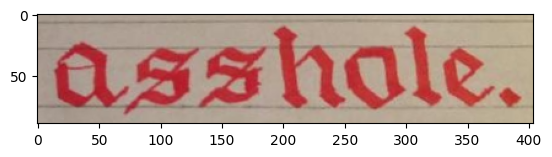

image      [[[243, 238, 237], [243, 238, 237], [243, 238,...
word_id                                               163814
id                                                   9j7E3RC
text                                                 Working
Name: 0, dtype: object


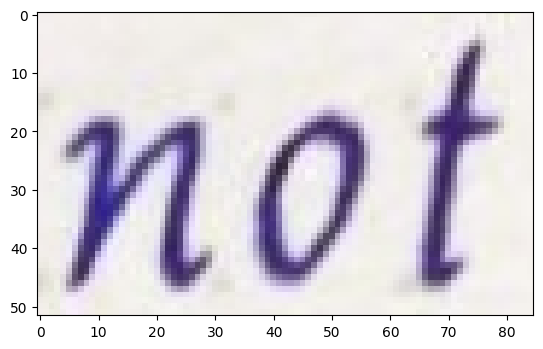

In [16]:
import matplotlib.pyplot as plt

print(train_df.iloc[0])
plt.imshow(train_df['image'][0])
plt.show()

print(eval_df.iloc[0])
plt.imshow(eval_df['image'][0])
plt.show()

## Step 2. Running the Model

### 2.1 Loading the Model

In [17]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

In [18]:
# get base model
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transfor

### 2.2 Formalize Dataset

In [19]:
import torch
from torch.utils.data import Dataset
from PIL import Image

class StyleDataset(Dataset):
    def __init__(self, df, processor, max_target_length=512):
        self.df = df
        self.processor = processor
        self.max_target_length = max_target_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
      try:
          text = self.df['text'][idx]
          if not isinstance(text, str) or not text.strip():
              raise ValueError(f"Invalid text at index {idx}: {repr(text)}")
          image_id = self.df['id'][idx]
          try:
              image = self.df['image'][idx]
          except Exception as e:
              raise ValueError(f"Failed to load image for ID {image_id} at index {idx}") from e
          try:
              pixel_values = self.processor(image, return_tensors="pt").pixel_values
          except Exception as e:
              raise ValueError(f"Image processing failed at index {idx}") from e

          if torch.isnan(pixel_values).any() or torch.isinf(pixel_values).any():
              raise ValueError(f"Invalid pixel values (NaN/inf) at index {idx}")
          try:
              labels = self.processor.tokenizer(
                  text,
                  padding="max_length",
                  max_length=self.max_target_length
              ).input_ids
          except Exception as e:
              raise ValueError(f"Tokenization failed for text at index {idx}") from e

          # Replace pad_token_id with -100 for loss masking
          labels = [
              label if label != self.processor.tokenizer.pad_token_id else -100
              for label in labels
          ]
          encoding = {
              "pixel_values": pixel_values.squeeze(),
              "labels": torch.tensor(labels)
          }

          if encoding["pixel_values"].dim() != 3:
              raise ValueError(f"Invalid pixel_values shape at index {idx}")

          if encoding["labels"].numel() != self.max_target_length:
              raise ValueError(f"Labels length mismatch at index {idx}")

          return encoding

      except Exception as e:
          print(f"\nError in sample {idx}:")
          print(f"   Error type: {type(e).__name__}")
          print(f"   Details: {str(e)}")
          if hasattr(e, '__cause__') and e.__cause__:
              print(f"   Underlying error: {type(e.__cause__).__name__}: {str(e.__cause__)}")
          print(f"   DataFrame row:\n{self.df.iloc[idx]}")
          return None

In [20]:
# Tokenized
train_dataset = StyleDataset(df=train_df,processor=processor)
eval_dataset= StyleDataset(df=eval_df,processor=processor)

In [21]:
print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(eval_dataset))

Number of training examples: 132067
Number of validation examples: 33017


In [22]:
# get the label string from encoding
def get_label_str(encoding):
  labels = encoding['labels']
  labels[labels == -100] = processor.tokenizer.pad_token_id
  label_str = processor.decode(labels, skip_special_tokens=True)
  return label_str

In [23]:
get_label_str(train_dataset[0])

'are'

### 2.3 Model Configuration

In [24]:
# Analyze your dataset first
avg_target_len = train_df['text'].apply(len).mean()
print("average target length", avg_target_len)
max_target_len = int(train_df['text'].apply(len).quantile(0.95))
print("maximum target length", max_target_len)

average target length 4.434817176130298
maximum target length 9


In [25]:
# Token Alignment
# set special tokens used for creating the decoder_input_ids from the labels
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id
# make sure vocab size is set correctly
model.config.vocab_size = len(processor.tokenizer)

In [26]:
from transformers import GenerationConfig

generation_config = GenerationConfig(
    max_length=64,
    early_stopping=True,
    num_beams=4,
    length_penalty=2.0,
    no_repeat_ngram_size=3,
    eos_token_id=processor.tokenizer.sep_token_id,
    decoder_start_token_id=processor.tokenizer.cls_token_id,
    pad_token_id=processor.tokenizer.pad_token_id,
    skip_special_tokens=True  # Added for consistent decoding
)

### 2.4 Metrics

In [27]:
from evaluate import load
cer_metric = load("cer")

def compute_metrics(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    pred_str = processor.batch_decode(pred_ids, skip_special_tokens=True)
    labels_ids[labels_ids == -100] = processor.tokenizer.pad_token_id
    label_str = processor.batch_decode(labels_ids, skip_special_tokens=True)

    cer = cer_metric.compute(predictions=pred_str, references=label_str)

    return {"cer": cer}

## Step 3. Fine-tune

In [28]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,
    eval_strategy="steps",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    fp16=True,
    output_dir="./output/models/words_v1/",
    logging_steps=2,
    save_steps=2000,
    eval_steps=1000,
    num_train_epochs=1,
    generation_config=generation_config)

In [ ]:
from transformers import default_data_collator
# instantiate trainer
trainer = Seq2SeqTrainer(
    model=model,
    processing_class=processor.image_processor,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=default_data_collator,
)
trainer.train()


In [ ]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,
    eval_strategy="steps",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    fp16=True,
    output_dir="./output/models/words_v1/",
    logging_steps=2,
    save_steps=2000,
    eval_steps=1000,
    num_train_epochs=1,
    generation_config=generation_config,
)

In [35]:
from transformers import default_data_collator
# instantiate trainer
trainer = Seq2SeqTrainer(
    model=model,
    processing_class=processor.image_processor,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=default_data_collator
)
trainer.train(resume_from_checkpoint=True)

There were missing keys in the checkpoint model loaded: ['decoder.output_projection.weight'].


Step,Training Loss,Validation Loss,Cer
7000,1.034300,4.867350,0.986054
8000,0.918300,4.843401,0.959834


/common/home/sk2779/courses/cs439/stylized-ocr/venv/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


TrainOutput(global_step=8255, training_loss=0.24936909624333095, metrics={'train_runtime': 5029.7147, 'train_samples_per_second': 26.257, 'train_steps_per_second': 1.641, 'total_flos': 9.88237803192645e+19, 'train_loss': 0.24936909624333095, 'epoch': 1.0})

## Step 4. Evaluation

In [36]:
from transformers import VisionEncoderDecoderModel

model_path = "output/models/words_v1/checkpoint-8255"
model =  VisionEncoderDecoderModel.from_pretrained(model_path).to("cuda")

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

In [37]:
df_test=pd.read_csv("df_test.csv")
df_test.head()

,word_id,id,text
0,0,7u2pNft,4
1,1,FXwDU08,Funk
2,2,FXwDU08,adelic
3,3,FXwDU08,or
4,4,FXwDU08,Brain


In [38]:
df_test = df_images.merge(df_test, left_index=True, right_on='word_id')

In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [56]:
from tqdm import tqdm
def readText_batch(model, df, indices):
    """Process multiple images at once"""
    images= [df['image'][idx] for idx in indices]
    pixel_values = processor(images=images, return_tensors="pt").pixel_values.to(device)
    generated_ids = model.generate(pixel_values)
    return processor.batch_decode(generated_ids, skip_special_tokens=True)

def process_all_rows_batched(model, df, batch_size=8):
    results = []
    for i in tqdm(range(0, len(df), batch_size), desc="Processing batches"):
        batch_indices = range(i, min(i+batch_size, len(df)))
        try:
            batch_texts = readText_batch(model, df, batch_indices)
            for idx, text in zip(batch_indices, batch_texts):
                results.append({
                    'id': df['id'][idx],
                    'preds': df['text'][idx],
                    'labels': text
                })
        except Exception as e:
            print(f"Error in batch {i//batch_size}: {str(e)}")
            for idx in batch_indices:
                results.append({
                    'id': df['id'][idx],
                    'labels': df['text'][idx],
                    'preds': None,
                    'error': str(e)
                })
    return pd.DataFrame(results)

In [47]:
results_df = process_all_rows_batched(df_test[:200], batch_size=8)

Processing batches: 100%|██████████| 25/25 [00:05<00:00,  4.29it/s]


In [49]:
results_df.head()

,id,preds,labels
0,7u2pNft,4,the
1,FXwDU08,Funk,the
2,FXwDU08,adelic,the
3,FXwDU08,or,the
4,FXwDU08,Brain,the


In [48]:
results_df[results_df['labels']!='the']

,id,preds,labels


In [51]:
len(train_df[train_df['text'].str.contains('the')])

5044

In [52]:
len(train_df)

132067